## Preparing the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file = pd.ExcelFile('Nebiant Analytics Lead Generation   .xlsx')

In [5]:
dataframes = []

In [6]:
for sheet_name in file.sheet_names:
    df = file.parse(sheet_name)
    df['Program'] = sheet_name
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Comments,Feedback,Column1,Program
0,2024-07-14 18:05:48.716,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,September 7,Danjuma,Send WA message,NaN,NaN,Data Science
1,2024-07-14 18:09:48.479,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,August 3,Danjuma,Interested in the DA path,Follow up,NaN,Data Science
2,2024-07-14 18:12:50.852,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,August 3,Danjuma,Can't afford the price,Can't pay,NaN,Data Science
3,2024-07-14 18:13:28.537,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,August 3,Danjuma,"Should check back before the end of today, int...",Follow up,NaN,Data Science
4,2024-07-14 18:14:09.487,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,August 3,Danjuma,"Checking the brochure and registration link, t...",Follow up,NaN,Data Science


In [7]:
data.shape

(687, 14)

In [9]:
data = data.drop(columns ='Column1', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Timestamp                                    687 non-null    datetime64[ns]
 1   Email Address                                687 non-null    object        
 2   First Name:                                  686 non-null    object        
 3   Last Name:                                   687 non-null    object        
 4   Phone number (Preferably WhatsApp enabled):  687 non-null    object        
 5   Gender:                                      687 non-null    object        
 6   Location (Country):                          687 non-null    object        
 7   How did you find out about this program:     687 non-null    object        
 8   When will you want to start your training:   687 non-null    object        
 9  

In [10]:
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Comments,Feedback,Program
0,2024-07-14 18:05:48.716,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,September 7,Danjuma,Send WA message,NaN,Data Science
1,2024-07-14 18:09:48.479,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,August 3,Danjuma,Interested in the DA path,Follow up,Data Science
2,2024-07-14 18:12:50.852,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,August 3,Danjuma,Can't afford the price,Can't pay,Data Science
3,2024-07-14 18:13:28.537,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,August 3,Danjuma,"Should check back before the end of today, int...",Follow up,Data Science
4,2024-07-14 18:14:09.487,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,August 3,Danjuma,"Checking the brochure and registration link, t...",Follow up,Data Science


## Checking For Missing Values, Duplicates and Inconsistencies

In [11]:
missing_values = data.isnull().sum()
print("Missing Values per Column: \n", missing_values)

Missing Values per Column: 
 Timestamp                                        0
Email Address                                    0
First Name:                                      1
Last Name:                                       0
Phone number (Preferably WhatsApp enabled):      0
Gender:                                          0
Location (Country):                              0
How did you find out about this program:         0
When will you want to start your training:       0
Lead Manager                                     0
Comments                                       427
Feedback                                       467
Program                                          0
dtype: int64


In [12]:
duplicates = data.duplicated().sum()
print("Number of Duplicated Rows:", duplicates)

Number of Duplicated Rows: 0


## Handling Missing Values

In [13]:
data['First Name:'].fillna('Unknown', inplace=True)

In [14]:
data['Comments'].fillna('No Comment', inplace=True)
data['Feedback'].fillna('No Feedback', inplace=True)

In [15]:
data.isnull().sum()

Timestamp                                      0
Email Address                                  0
First Name:                                    0
Last Name:                                     0
Phone number (Preferably WhatsApp enabled):    0
Gender:                                        0
Location (Country):                            0
How did you find out about this program:       0
When will you want to start your training:     0
Lead Manager                                   0
Comments                                       0
Feedback                                       0
Program                                        0
dtype: int64

In [16]:
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Comments,Feedback,Program
0,2024-07-14 18:05:48.716,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,September 7,Danjuma,Send WA message,No Feedback,Data Science
1,2024-07-14 18:09:48.479,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,August 3,Danjuma,Interested in the DA path,Follow up,Data Science
2,2024-07-14 18:12:50.852,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,August 3,Danjuma,Can't afford the price,Can't pay,Data Science
3,2024-07-14 18:13:28.537,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,August 3,Danjuma,"Should check back before the end of today, int...",Follow up,Data Science
4,2024-07-14 18:14:09.487,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,August 3,Danjuma,"Checking the brochure and registration link, t...",Follow up,Data Science


In [17]:
data.tail()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Comments,Feedback,Program
682,2024-10-24 21:28:10.532,seun.akin43@gmail.com,Toluwanimi,Akinyemi,99679613999,Male,Nigeria,Family and Friends,December 5,Unassigned,No Comment,No Feedback,Data Analytics
683,2024-10-24 21:43:52.397,chukwupriscillia05@gmail.com,Priscillia,Chukwuemeka,71864520634,Female,Nigeria,Instagram,December 5,Unassigned,No Comment,No Feedback,Data Analytics
684,2024-11-07 20:48:23.692,goodluckomokaro@gmail.com,Omokaro Goodluck,Osamudiamen,10978345918,Male,Nigeria,Facebook,December 5,Unassigned,No Comment,No Feedback,Data Analytics
685,2024-11-07 20:48:45.288,christopherqueen095@gmail.com,Queen Odede,Christopher,91696397264,Female,Nigeria,Facebook,November 2,Unassigned,No Comment,No Feedback,Data Analytics
686,2024-11-07 21:33:51.466,Ebylinda6311@gmail.com,Linda,Onukwufor,84831391866,Female,Nigeria,Instagram,December 5,Unassigned,No Comment,No Feedback,Data Analytics


## Exploratory Data Analysis

### Distribution of Gender

In [18]:
gender_counts = data['Gender:'].value_counts()
gender_percentage =(gender_counts/gender_counts.sum())*100

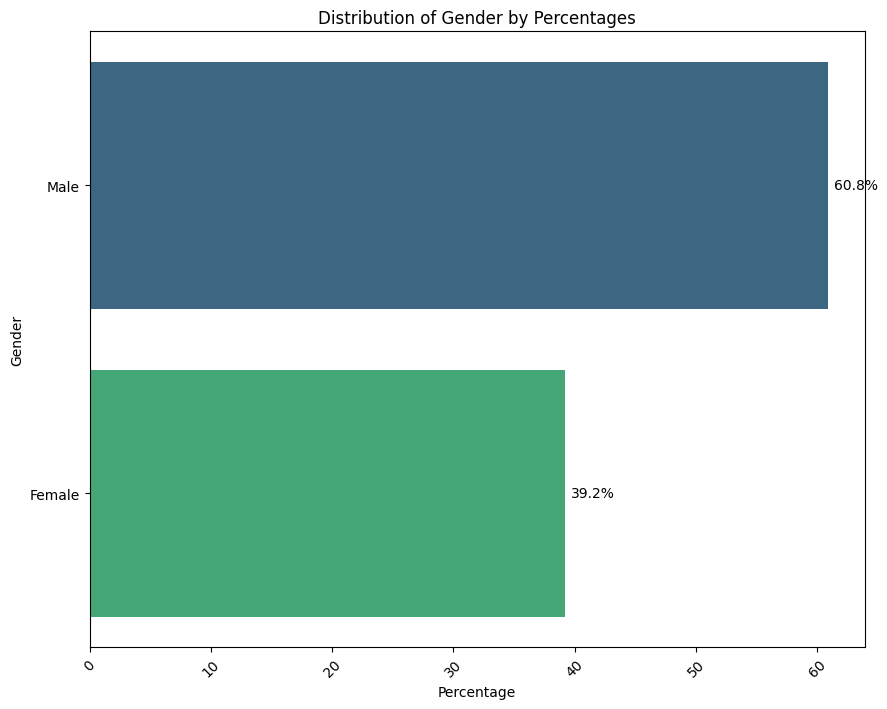

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x=gender_percentage, y=gender_percentage.index, palette="viridis")

for i, percentage in enumerate(gender_percentage):
    plt.text(percentage + 0.5, i, f'{percentage:.1f}%', va='center')

plt.title("Distribution of Gender by Percentages")
plt.xlabel("Percentage")
plt.ylabel("Gender")
plt.xticks(rotation=45)
plt.show()

### Distribution of Lead Source

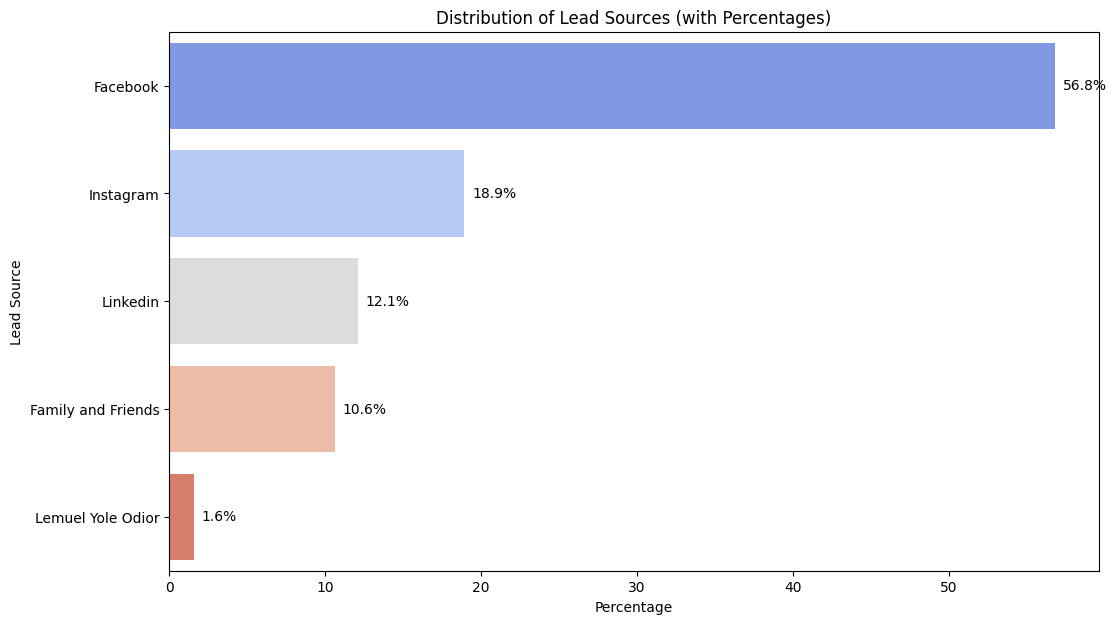

In [20]:
lead_source_counts = data['How did you find out about this program:'].value_counts()
lead_source_percentages = (lead_source_counts / lead_source_counts.sum()) * 100

plt.figure(figsize=(12, 7))
sns.barplot(x=lead_source_percentages, y=lead_source_percentages.index, palette="coolwarm")

for i, percentage in enumerate(lead_source_percentages):
    plt.text(percentage + 0.5, i, f'{percentage:.1f}%', va='center')

plt.title("Distribution of Lead Sources (with Percentages)")
plt.xlabel("Percentage")
plt.ylabel("Lead Source")
plt.show()

### Calculate the percentage distribution of Location

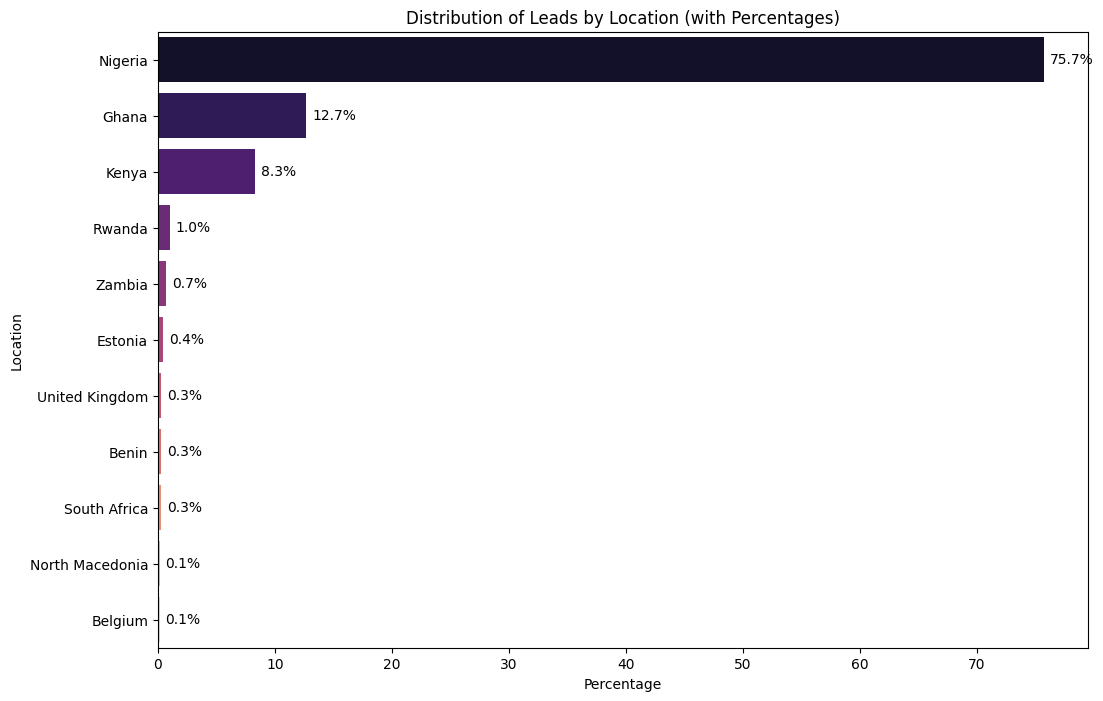

In [21]:
location_counts = data['Location (Country):'].value_counts()
location_percentages = (location_counts / location_counts.sum()) * 100

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=location_percentages, y=location_percentages.index, palette="magma")

# Annotate percentages
for i, percentage in enumerate(location_percentages):
    plt.text(percentage + 0.5, i, f'{percentage:.1f}%', va='center')

# Title and labels
plt.title("Distribution of Leads by Location (with Percentages)")
plt.xlabel("Percentage")
plt.ylabel("Location")
plt.show()

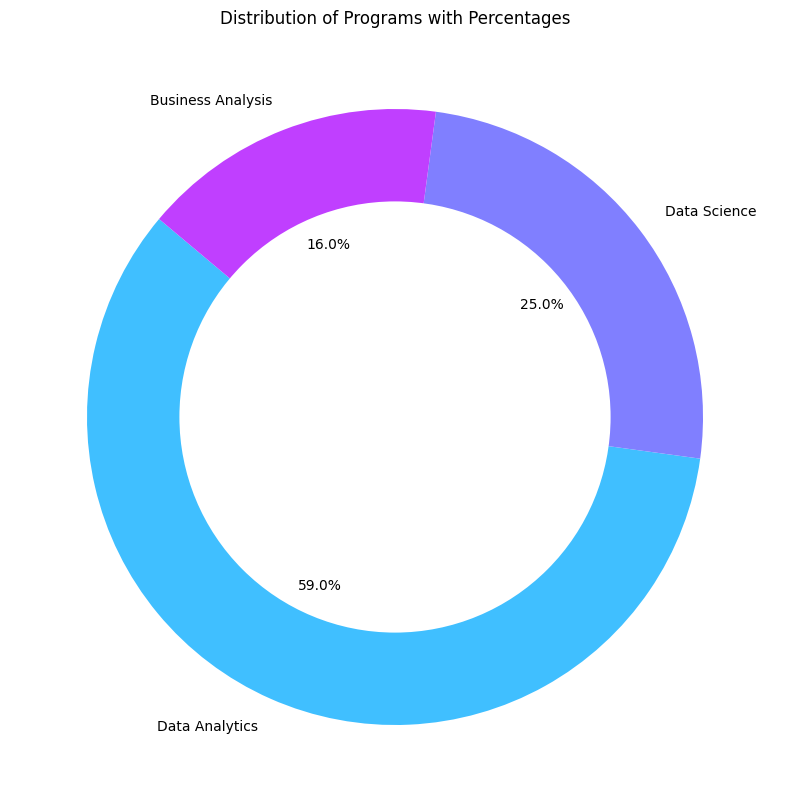

In [22]:
program_counts = data['Program'].value_counts()
program_percentages = (program_counts / program_counts.sum()) * 100

plt.figure(figsize=(10, 10))
plt.pie(program_percentages, labels=program_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("cool", len(program_percentages)))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Distribution of Programs with Percentages")
plt.show()

## Calculating the percentage distribution of Lead Managers

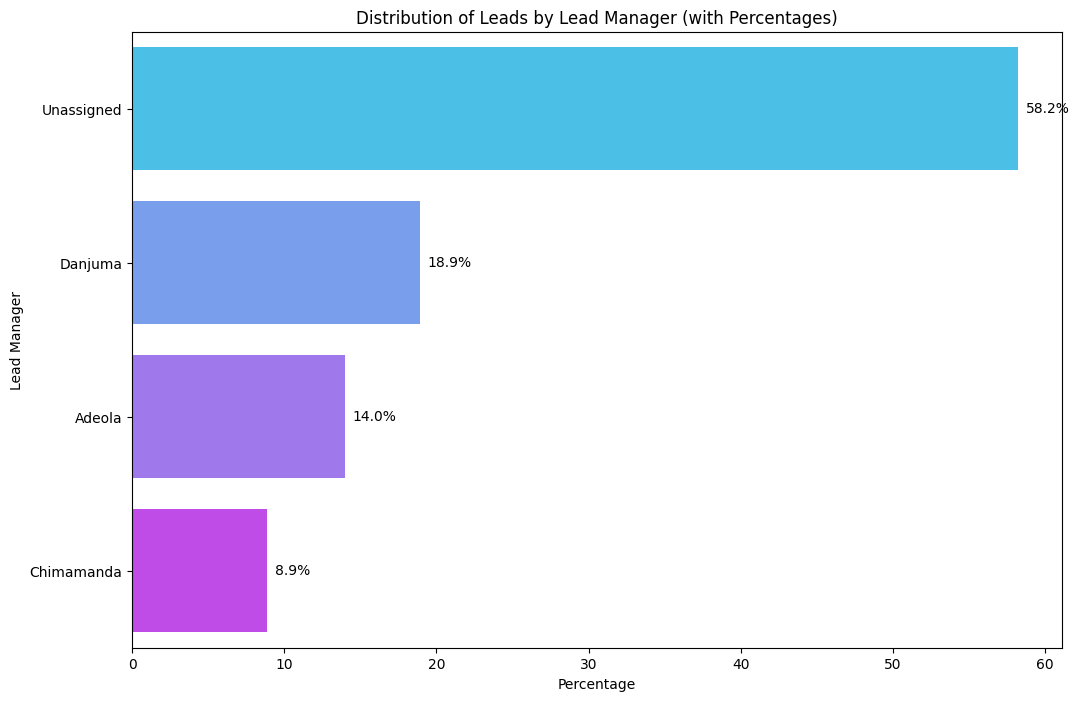

In [23]:
lead_manager_counts = data['Lead Manager'].value_counts()
lead_manager_percentages = (lead_manager_counts / lead_manager_counts.sum()) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=lead_manager_percentages, y=lead_manager_percentages.index, palette="cool")

for i, percentage in enumerate(lead_manager_percentages):
    plt.text(percentage + 0.5, i, f'{percentage:.1f}%', va='center')

plt.title("Distribution of Leads by Lead Manager (with Percentages)")
plt.xlabel("Percentage")
plt.ylabel("Lead Manager")
plt.show()

In [24]:
from datetime import datetime

In [25]:
data['Timestamp'] = pd.to_datetime(data['Timestamp']).dt.date

# Handle 'When will you want to start your training:' column
# Append the year '2024' to the month and day
data['When will you want to start your training:'] = data['When will you want to start your training:'].apply(
    lambda x: f"2024 {x}" if pd.notnull(x) else None
)

In [26]:
# Convert the updated column to datetime and extract only the date
data['When will you want to start your training:'] = pd.to_datetime(
    data['When will you want to start your training:'], format="%Y %B %d", errors='coerce'
).dt.date

In [27]:
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Comments,Feedback,Program
0,2024-07-14,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,2024-09-07,Danjuma,Send WA message,No Feedback,Data Science
1,2024-07-14,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,2024-08-03,Danjuma,Interested in the DA path,Follow up,Data Science
2,2024-07-14,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,2024-08-03,Danjuma,Can't afford the price,Can't pay,Data Science
3,2024-07-14,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,2024-08-03,Danjuma,"Should check back before the end of today, int...",Follow up,Data Science
4,2024-07-14,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,2024-08-03,Danjuma,"Checking the brochure and registration link, t...",Follow up,Data Science


In [28]:
# Calculate time-to-start in days
data['Readiness (Days)'] = (data['When will you want to start your training:'] - data['Timestamp']).apply(lambda x: x.days if pd.notnull(x) else None)

# Output the results
print("Readiness Feature Created:")
print(data[['Timestamp', 'When will you want to start your training:', 'Readiness (Days)']].head())

Readiness Feature Created:
    Timestamp When will you want to start your training:  Readiness (Days)
0  2024-07-14                                 2024-09-07              55.0
1  2024-07-14                                 2024-08-03              20.0
2  2024-07-14                                 2024-08-03              20.0
3  2024-07-14                                 2024-08-03              20.0
4  2024-07-14                                 2024-08-03              20.0


In [29]:
# Summary statistics
readiness_summary = data['Readiness (Days)'].describe()
print("Summary Statistics for Readiness (Days):\n", readiness_summary)

Summary Statistics for Readiness (Days):
 count    684.000000
mean      24.505848
std       17.564313
min      -40.000000
25%       13.000000
50%       20.000000
75%       44.000000
max       55.000000
Name: Readiness (Days), dtype: float64


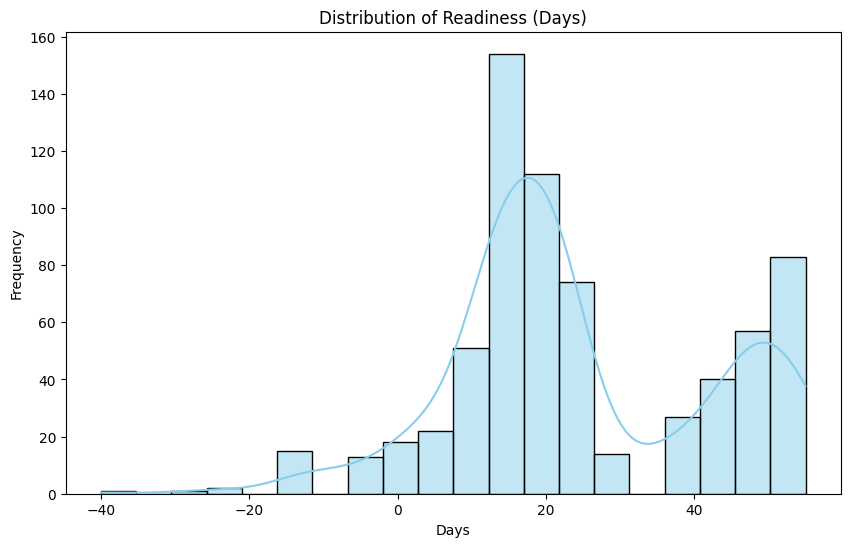

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Readiness (Days)'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Readiness (Days)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Average Readiness (Days) by Program:
 Program
Data Science         23.0
Business Analysis    25.0
Data Analytics       25.0
Name: Readiness (Days), dtype: float64


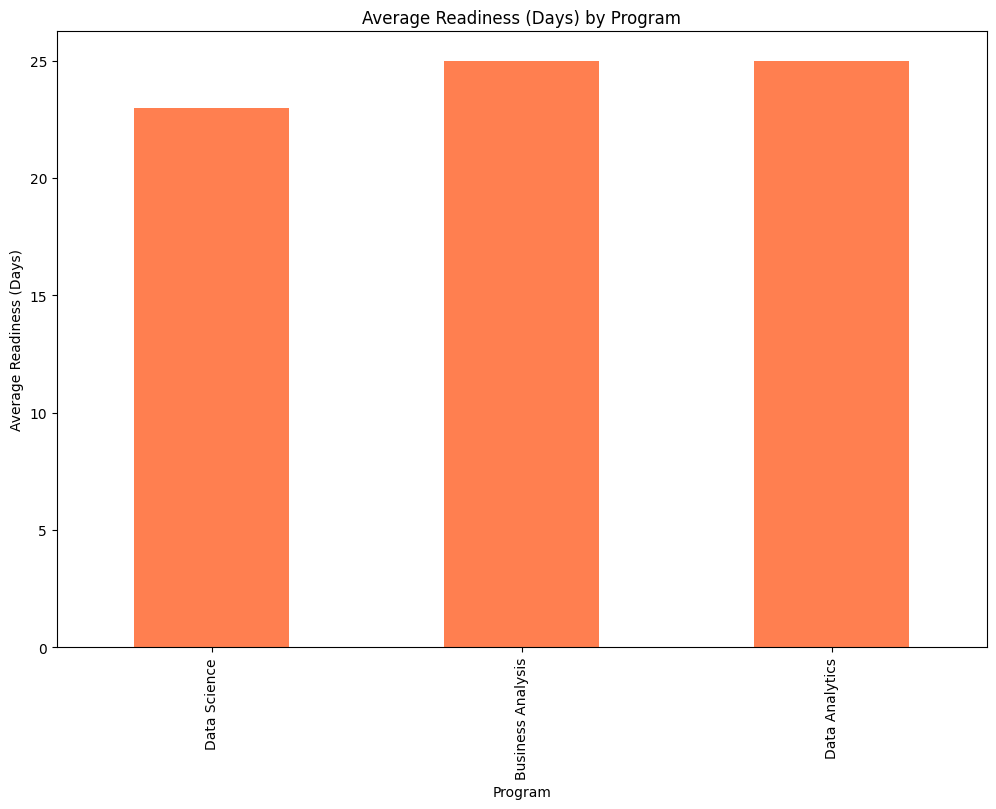

In [31]:
# Group analysis by Program
readiness_by_program = data.groupby('Program')['Readiness (Days)'].mean().round().sort_values()
print("Average Readiness (Days) by Program:\n", readiness_by_program)

# Barplot for visualization
plt.figure(figsize=(12, 8))
readiness_by_program.plot(kind='bar', color="coral")
plt.title("Average Readiness (Days) by Program")
plt.xlabel("Program")
plt.ylabel("Average Readiness (Days)")
plt.show()

In [32]:
# Identify outliers (e.g., beyond 1.5x IQR)
Q1 = data['Readiness (Days)'].quantile(0.25)
Q3 = data['Readiness (Days)'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Readiness (Days)'] < (Q1 - 1.5 * IQR)) | (data['Readiness (Days)'] > (Q3 + 1.5 * IQR))]
print("Outliers in Readiness (Days):\n", outliers[['Readiness (Days)', 'Timestamp', 'When will you want to start your training:']])

Outliers in Readiness (Days):
      Readiness (Days)   Timestamp When will you want to start your training:
163             -40.0  2024-10-17                                 2024-09-07


In [33]:
# Retrieve row 163 from the dataset
row_163 = data.iloc[163]

# Display the row
print(row_163)

Timestamp                                                   2024-10-17
Email Address                                  williambola02@gmail.com
First Name:                                                  Barnabas 
Last Name:                                              Tolorunshagba 
Phone number (Preferably WhatsApp enabled):                19394231527
Gender:                                                           Male
Location (Country):                                            Nigeria
How did you find out about this program:                      Facebook
When will you want to start your training:                  2024-09-07
Lead Manager                                                Unassigned
Comments                                                    No Comment
Feedback                                                   No Feedback
Program                                                   Data Science
Readiness (Days)                                                 -40.0
Name: 

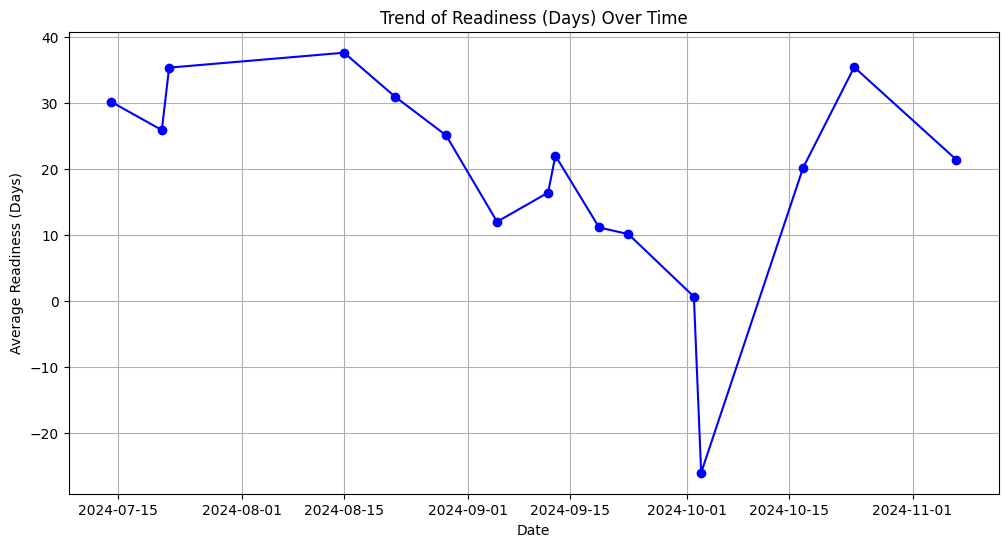

In [34]:
# Trend analysis
readiness_trend = data.groupby(data['Timestamp'])['Readiness (Days)'].mean()

plt.figure(figsize=(12, 6))
readiness_trend.plot(color="blue", marker='o')
plt.title("Trend of Readiness (Days) Over Time")
plt.xlabel("Date")
plt.ylabel("Average Readiness (Days)")
plt.grid()
plt.show()

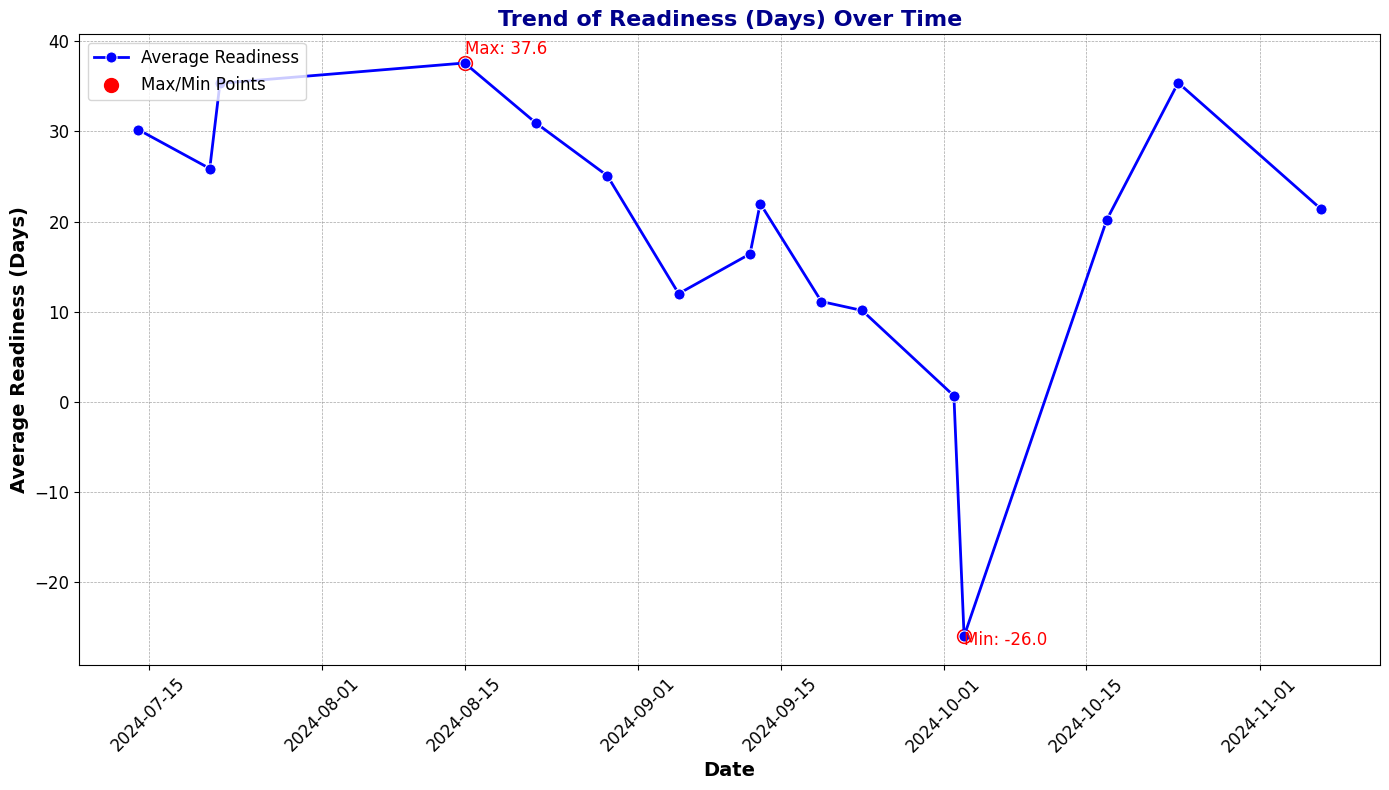

In [35]:
# Trend analysis
readiness_trend = data.groupby(data['Timestamp'])['Readiness (Days)'].mean()

# Create a more beautiful plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=readiness_trend, color="blue", marker='o', linewidth=2, markersize=8, label="Average Readiness")
plt.title("Trend of Readiness (Days) Over Time", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Average Readiness (Days)", fontsize=14, fontweight='bold')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight maximum and minimum points
max_date = readiness_trend.idxmax()
max_value = readiness_trend.max()
min_date = readiness_trend.idxmin()
min_value = readiness_trend.min()
plt.scatter([max_date, min_date], [max_value, min_value], color='red', s=100, label="Max/Min Points")
plt.text(max_date, max_value + 1, f"Max: {max_value:.1f}", fontsize=12, color='red')
plt.text(min_date, min_value - 1, f"Min: {min_value:.1f}", fontsize=12, color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()

plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Feature Engineering

In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
print("Unique Lead Sources:", data['How did you find out about this program:'].unique())

Unique Lead Sources: ['Facebook' 'Linkedin' 'Family and Friends' 'Instagram'
 'Lemuel Yole Odior']


In [39]:
label_encoder = LabelEncoder()
data['Lead Source Encoded'] = label_encoder.fit_transform(data['How did you find out about this program:'])
data['Location Encoded'] = label_encoder.fit_transform(data['Location (Country):'])

In [41]:
# Performing Sentiment Analysis on Comments and Feedback
analyzer = SentimentIntensityAnalyzer()
for col in ['Comments', 'Feedback']:
    if col in data.columns:
        data[f'{col}_Sentiment_Score'] = data[col].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

In [42]:
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Comments,Feedback,Program,Readiness (Days),Lead Source Encoded,Location Encoded,Comments_Sentiment_Score,Feedback_Sentiment_Score
0,2024-07-14,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,2024-09-07,Danjuma,Send WA message,No Feedback,Data Science,55.0,0,4,0.0000,-0.2960
1,2024-07-14,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,2024-08-03,Danjuma,Interested in the DA path,Follow up,Data Science,20.0,0,5,0.4019,0.0000
2,2024-07-14,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,2024-08-03,Danjuma,Can't afford the price,Can't pay,Data Science,20.0,0,5,0.0000,0.0762
3,2024-07-14,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,2024-08-03,Danjuma,"Should check back before the end of today, int...",Follow up,Data Science,20.0,0,3,0.4019,0.0000
4,2024-07-14,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,2024-08-03,Danjuma,"Checking the brochure and registration link, t...",Follow up,Data Science,20.0,0,4,0.0000,0.0000


In [43]:
data =data.drop(columns='Comments', errors='ignore')
data =data.drop(columns='Feedback', errors='ignore')
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Program,Readiness (Days),Lead Source Encoded,Location Encoded,Comments_Sentiment_Score,Feedback_Sentiment_Score
0,2024-07-14,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,2024-09-07,Danjuma,Data Science,55.0,0,4,0.0000,-0.2960
1,2024-07-14,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,5,0.4019,0.0000
2,2024-07-14,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,5,0.0000,0.0762
3,2024-07-14,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,3,0.4019,0.0000
4,2024-07-14,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,4,0.0000,0.0000


In [44]:
data['Gender_Encoded'] = label_encoder.fit_transform(data['Gender:'].fillna('Unknown'))
data['LeadManager_Encoded'] = label_encoder.fit_transform(data['Lead Manager'].fillna('Unknown'))
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,Program,Readiness (Days),Lead Source Encoded,Location Encoded,Comments_Sentiment_Score,Feedback_Sentiment_Score,Gender_Encoded,LeadManager_Encoded
0,2024-07-14,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,2024-09-07,Danjuma,Data Science,55.0,0,4,0.0000,-0.2960,1,2
1,2024-07-14,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,5,0.4019,0.0000,1,2
2,2024-07-14,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,5,0.0000,0.0762,1,2
3,2024-07-14,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,3,0.4019,0.0000,1,2
4,2024-07-14,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,2024-08-03,Danjuma,Data Science,20.0,0,4,0.0000,0.0000,1,2


In [45]:
data['Program_Encoded'] = label_encoder.fit_transform(data['Program'].fillna('Unknown'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Timestamp                                    687 non-null    object 
 1   Email Address                                687 non-null    object 
 2   First Name:                                  687 non-null    object 
 3   Last Name:                                   687 non-null    object 
 4   Phone number (Preferably WhatsApp enabled):  687 non-null    object 
 5   Gender:                                      687 non-null    object 
 6   Location (Country):                          687 non-null    object 
 7   How did you find out about this program:     687 non-null    object 
 8   When will you want to start your training:   684 non-null    object 
 9   Lead Manager                                 687 non-null    object 
 10  Pr

In [92]:
# Define thresholds for converting continuous values into categories
def map_sentiment_to_category(sentiment_value):
    if sentiment_value < 0.2:
        return '0'
    elif 0.2 <= sentiment_value < 0.5:
        return '1'
    else:
        return '2'

# Apply the mapping function
data['Lead_Conversion_Likelihood'] = data['Comments_Sentiment_Score'].apply(map_sentiment_to_category)

# Ensure it's categorical
data['Lead_Conversion_Likelihood'] = data['Lead_Conversion_Likelihood'].astype('int')

In [93]:
data[['Comments_Sentiment_Score', 'Lead_Conversion_Likelihood']].head()

,Comments_Sentiment_Score,Lead_Conversion_Likelihood
0,0.0000,0
1,0.4019,1
2,0.0000,0
3,0.4019,1
4,0.0000,0


## Train-Test Split and Model Training

In [94]:
X = data[[
    'Lead Source Encoded',
    'Program_Encoded',
    'Location Encoded',
    'Feedback_Sentiment_Score',  
    'Readiness (Days)', 
    'Gender_Encoded', 
    'LeadManager_Encoded',
    'Comments_Sentiment_Score'
]]
y = data['Lead_Conversion_Likelihood']

In [95]:
# Checking the distribution of target classes (Class Imbalance)
print(y.value_counts(normalize=True))

Lead_Conversion_Likelihood
0    0.959243
1    0.033479
2    0.007278
Name: proportion, dtype: float64


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (549, 8)
Test Set Size: (138, 8)


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [101]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [102]:
# Training and evaluating models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    model_results[name] = accuracy

# Results
for model, acc in model_results.items():
    print(f'{model}: Accuracy = {acc:.2f}')

Decision Tree: Accuracy = 0.99
Random Forest: Accuracy = 1.00
XGBoost: Accuracy = 1.00


In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
# Defining hyperparameters for each model
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0]
    }
}

In [105]:
# Hyperparameter tuning and model evaluation
model_results = {}

for name, model in models.items():
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Best model and its accuracy
    best_model = grid_search.best_estimator_
    best_accuracy = best_model.score(X_test, y_test)
    
    model_results[name] = {
        'Best Model': best_model,
        'Best Params': grid_search.best_params_,
        'Accuracy': best_accuracy
    }

# Results
for model, result in model_results.items():
    print(f'{model}:')
    print(f'  Best Params: {result["Best Params"]}')
    print(f'  Accuracy: {result["Accuracy"]:.2f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Decision Tree:
  Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
  Accuracy: 0.99
Random Forest:
  Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy: 1.00
XGBoost:
  Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
  Accuracy: 1.00


In [106]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [107]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
# Evaluating the model
y_pred = model.predict(X_test)

In [109]:
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



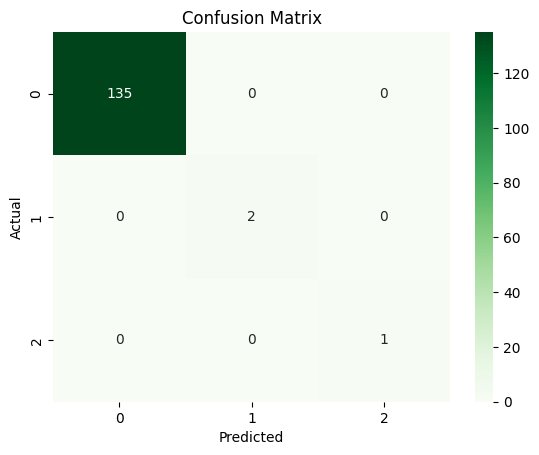

In [110]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [111]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    Feature  Importance
7  Comments_Sentiment_Score    0.684771
3  Feedback_Sentiment_Score    0.141928
4          Readiness (Days)    0.045913
2          Location Encoded    0.036362
6       LeadManager_Encoded    0.033990
5            Gender_Encoded    0.023330
0       Lead Source Encoded    0.023330
1           Program_Encoded    0.010378


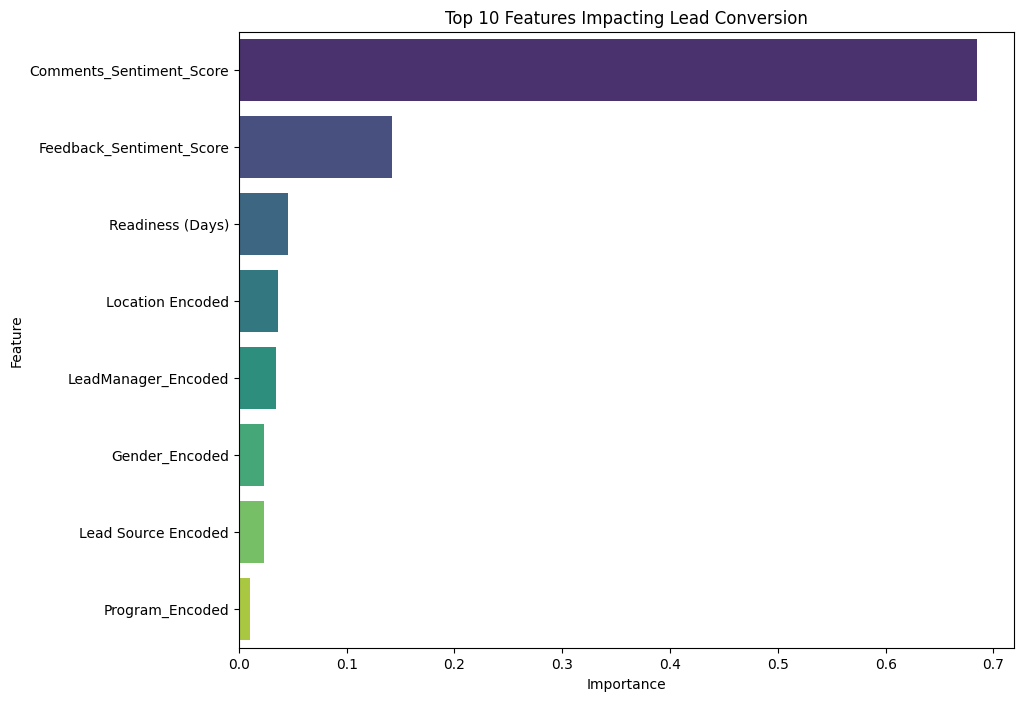

In [112]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance[:10], palette='viridis')
plt.title("Top 10 Features Impacting Lead Conversion")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [113]:
# Predict probabilities for lead scoring
data['Lead_Conversion_Score'] = model.predict_proba(X)[:, 1]

In [114]:
# A function to map predictions to categories based on the specified ranges
def map_to_category(pred):
    if 0.0 <= pred <= 0.3:
        return "Low"
    elif 0.3 < pred <= 0.8:
        return "Medium"
    else:
        return "High"

# Get model predictions
predictions = model.predict(X)

# Map the numerical predictions to their corresponding categories
data['Lead_Conversion_Category'] = [map_to_category(pred) for pred in predictions]


In [115]:
data.head()

,Timestamp,Email Address,First Name:,Last Name:,Phone number (Preferably WhatsApp enabled):,Gender:,Location (Country):,How did you find out about this program:,When will you want to start your training:,Lead Manager,...,Lead Source Encoded,Location Encoded,Comments_Sentiment_Score,Feedback_Sentiment_Score,Gender_Encoded,LeadManager_Encoded,Program_Encoded,Lead_Conversion_Likelihood,Lead_Conversion_Score,Lead_Conversion_Category
0,2024-07-14,nnyagoe@gmail.com,Nickey,Ombasa,0799934772,Male,Kenya,Facebook,2024-09-07,Danjuma,...,0,4,0.0000,-0.2960,1,2,2,0,0.00,Low
1,2024-07-14,salesmanforjesus@gmail.com,Alexander,Henry Franklin,08030977905,Male,Nigeria,Facebook,2024-08-03,Danjuma,...,0,5,0.4019,0.0000,1,2,2,1,0.95,High
2,2024-07-14,miketejumola@gmail.com,Micheal,Fatoki,08104280991,Male,Nigeria,Facebook,2024-08-03,Danjuma,...,0,5,0.0000,0.0762,1,2,2,0,0.00,Low
3,2024-07-14,brightgrantson7@gmail.com,Bright,Grantson,47068530672,Male,Ghana,Facebook,2024-08-03,Danjuma,...,0,3,0.4019,0.0000,1,2,2,1,0.97,High
4,2024-07-14,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,2024-08-03,Danjuma,...,0,4,0.0000,0.0000,1,2,2,0,0.00,Low


In [116]:
# Save your DataFrame to a CSV file
data.to_csv('Lead Conversion Prediction.csv', index=False)

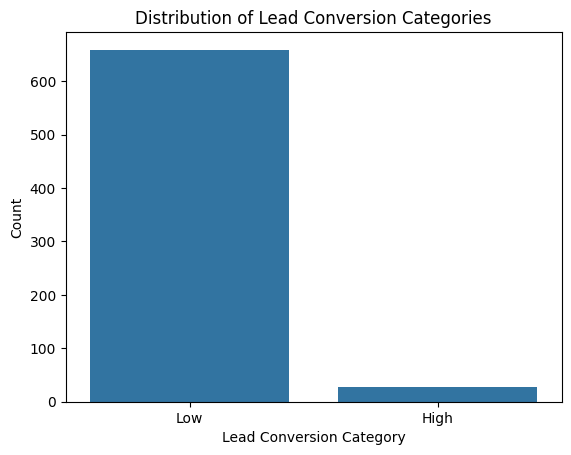

In [117]:
# Plot the distribution of Lead_Conversion_Category
sns.countplot(x='Lead_Conversion_Category', data=data)
plt.title('Distribution of Lead Conversion Categories')
plt.xlabel('Lead Conversion Category')
plt.ylabel('Count')
plt.show()

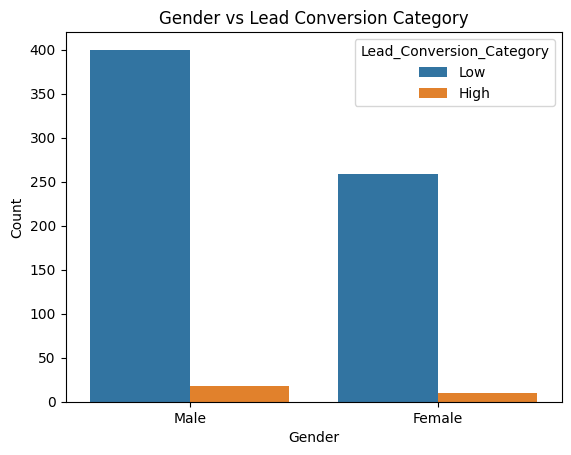

In [118]:
# Countplot for Gender vs. Lead_Conversion_Category
sns.countplot(x='Gender:', hue='Lead_Conversion_Category', data=data)
plt.title('Gender vs Lead Conversion Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

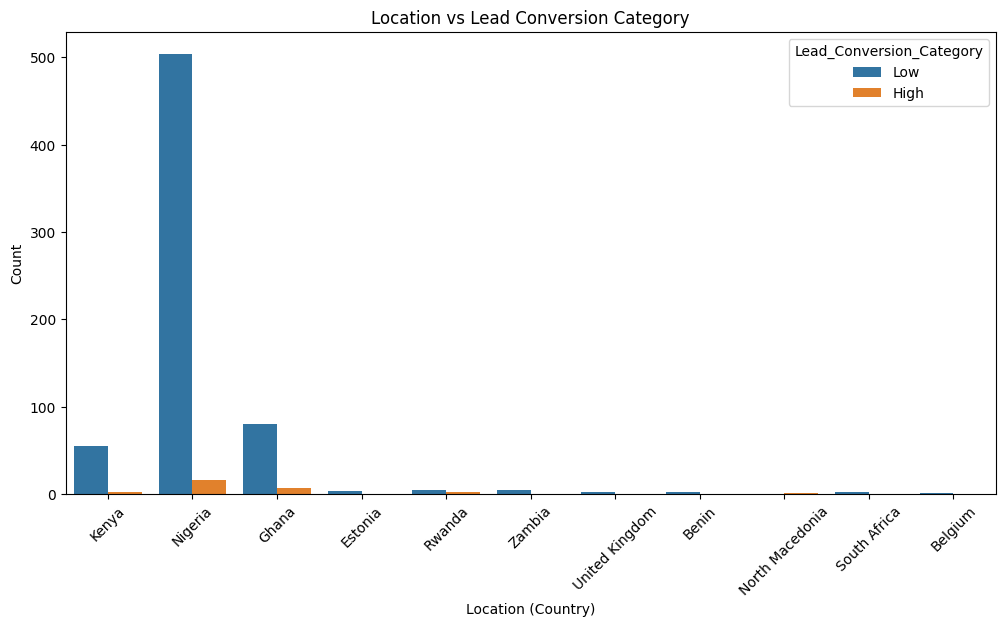

In [119]:
plt.figure(figsize=(12,6))
sns.countplot(x='Location (Country):', hue='Lead_Conversion_Category', data=data)
plt.title('Location vs Lead Conversion Category')
plt.xlabel('Location (Country)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

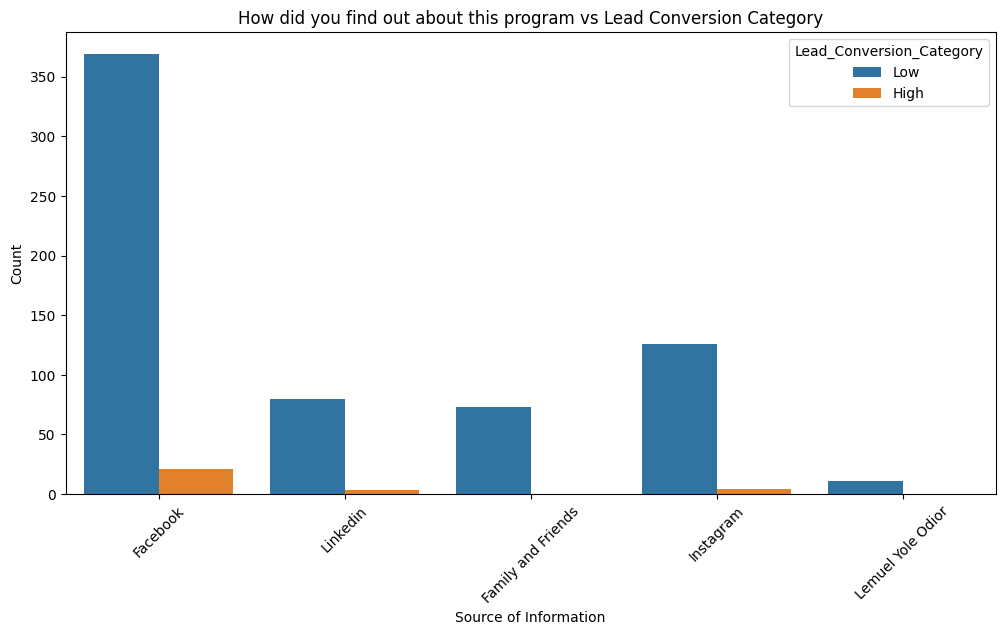

In [120]:
# Countplot for 'How did you find out about this program' vs. Lead_Conversion_Category
plt.figure(figsize=(12,6))
sns.countplot(x='How did you find out about this program:', hue='Lead_Conversion_Category', data=data)
plt.title('How did you find out about this program vs Lead Conversion Category')
plt.xlabel('Source of Information')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

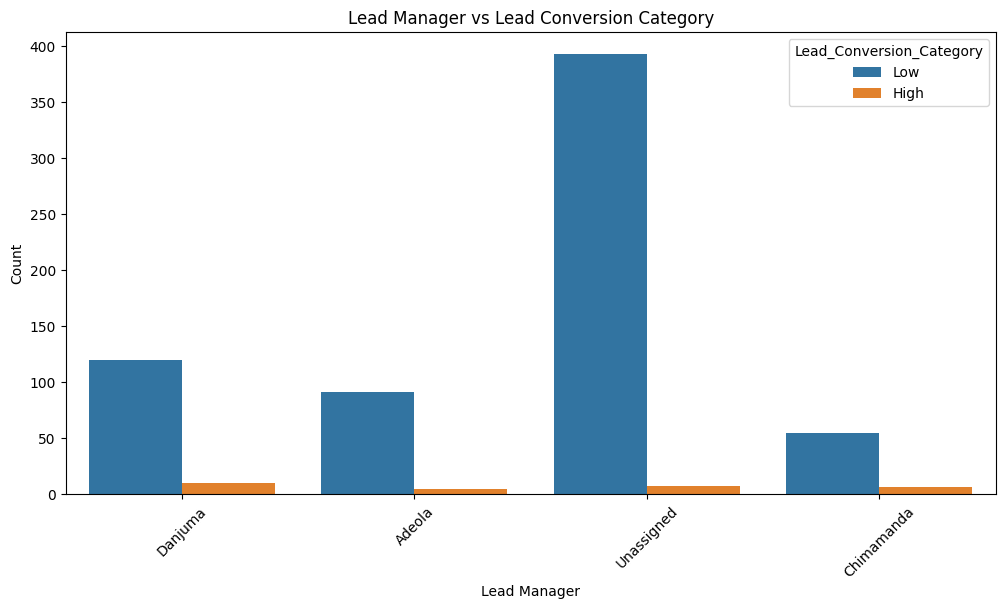

In [121]:
# Countplot for Lead Manager vs. Lead_Conversion_Category
plt.figure(figsize=(12,6))
sns.countplot(x='Lead Manager', hue='Lead_Conversion_Category', data=data)
plt.title('Lead Manager vs Lead Conversion Category')
plt.xlabel('Lead Manager')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

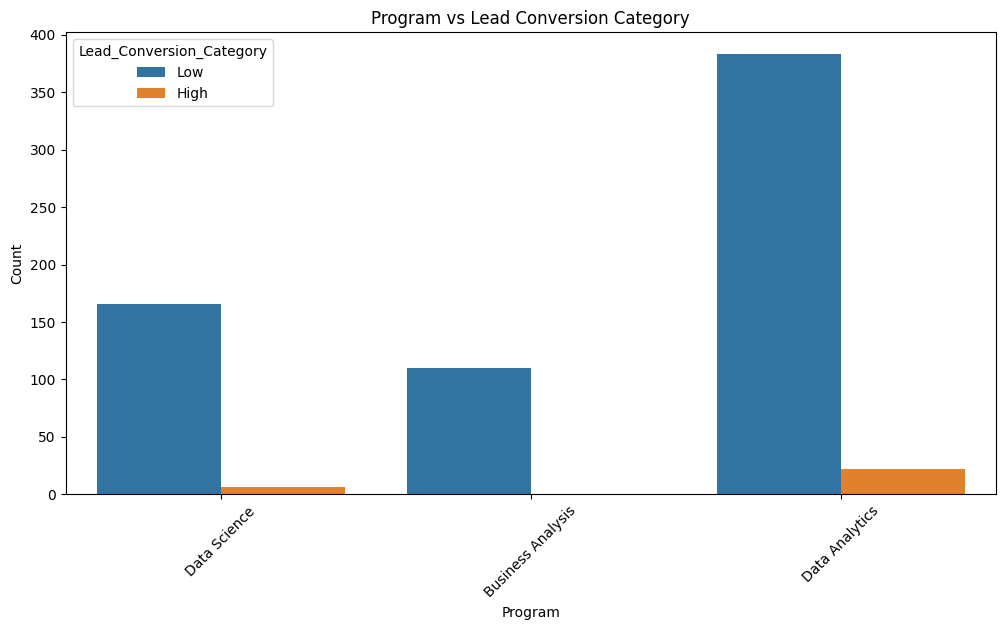

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(x='Program', hue='Lead_Conversion_Category', data=data)
plt.title('Program vs Lead Conversion Category')
plt.xlabel('Program')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

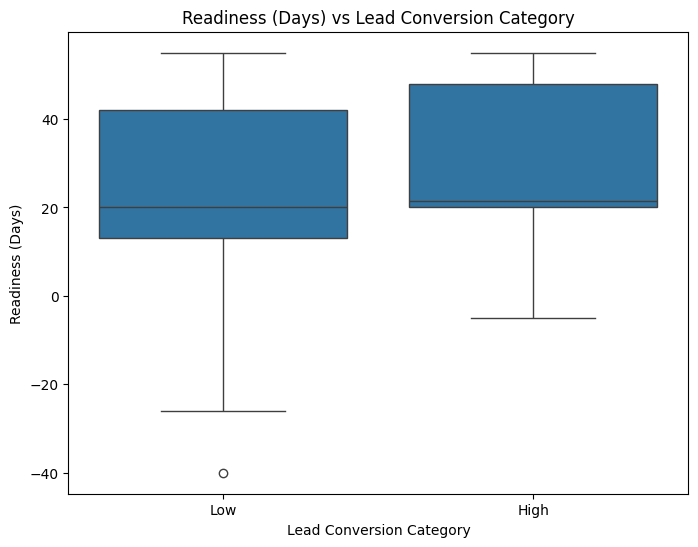

In [123]:
# Boxplot for Readiness (Days) vs. Lead_Conversion_Category
plt.figure(figsize=(8,6))
sns.boxplot(x='Lead_Conversion_Category', y='Readiness (Days)', data=data)
plt.title('Readiness (Days) vs Lead Conversion Category')
plt.xlabel('Lead Conversion Category')
plt.ylabel('Readiness (Days)')
plt.show()

In [124]:
import shap
explainer = shap.KernelExplainer(model.predict, X)

Using 687 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [125]:
# Get SHAP values for the dataset
shap_values = explainer.shap_values(X)

  0%|          | 0/687 [00:00<?, ?it/s]

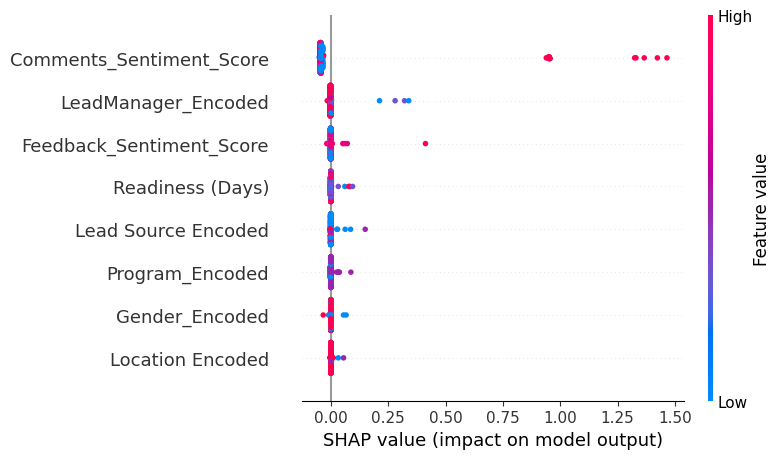

In [126]:
# Plot a summary plot to visualize feature importances
shap.summary_plot(shap_values, X)

In [135]:
# Ensure 'Lead Conversion Score' column exists
if 'Lead_Conversion_Score' in data.columns:
    # Sort the data by Lead Conversion Score in descending order
    sorted_data = data.sort_values(by='Lead_Conversion_Score', ascending=False)

    # Top 10 highest Lead Conversion Scores
    top_10_highest = sorted_data.head(10)
    print("Top 10 Highest Lead Conversion Scores:")
    print(top_10_highest[['Email Address', 'Lead_Conversion_Category']])

    # Top 10 lowest Lead Conversion Scores
    bottom_10_lowest = sorted_data.tail(10)
    print("\nTop 10 Lowest Lead Conversion Scores:")
    print(bottom_10_lowest[['Email Address', 'Lead_Conversion_Category']])
else:
    print("Column 'Lead Conversion Score' does not exist in the dataset.")


Top 10 Highest Lead Conversion Scores:
                      Email Address Lead_Conversion_Category
416    aderemiadenigbagbe@gmail.com                     High
3         brightgrantson7@gmail.com                     High
29          eshundesmond8@gmail.com                     High
27              neche.sdc@gmail.com                     High
1        salesmanforjesus@gmail.com                     High
548            lorduzochi@gmail.com                     High
403  baptistehategekavive@gmail.com                     High
323           bilyaminu20@gmail.com                     High
601          aaronghelp25@gmail.com                     High
473      anthoniaagbelusi@gmail.com                     High

Top 10 Lowest Lead Conversion Scores:
                     Email Address Lead_Conversion_Category
677          ucheokorie1@gmail.com                      Low
678       joygenevieve09@gmail.com                      Low
679     oladotunolagunju@gmail.com                      Low
680        